USING KERAS

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data,train_label),(test_data,test_label)=tf.keras.datasets.imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [3]:
train_label[0]

1

In [4]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [5]:
word_index=tf.keras.datasets.imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [6]:
# Use the default parameters to keras.datasets.imdb.load_data
start_char = 1
oov_char = 2
index_from = 3
# Retrieve the training sequences.
(train_data,train_label),(test_data,test_label)= tf.keras.datasets.imdb.load_data(
    start_char=start_char, oov_char=oov_char, index_from=index_from,num_words=10000
)
# Retrieve the word index file mapping words to indices
word_index = tf.keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in train_data[0])

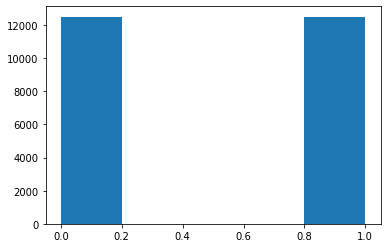

In [7]:
plt.hist(train_label,bins=5)
plt.show()

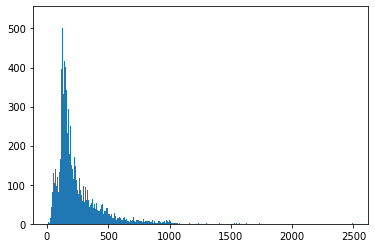

In [8]:
lengths=[len(t) for t in train_data]
plt.hist(lengths,bins=len(set(lengths)))
plt.show()

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train.shape

(25000, 10000)

In [12]:
x_test.shape

(25000, 10000)

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
y_train = np.array(train_label).astype('float32')
y_test = np.array(test_label).astype('float32')

In [15]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [16]:
limit=int(x_train.shape[0]*0.80)

In [17]:
x_val=x_train[:limit]
x_train_=x_train[limit:]
y_val=y_train[:limit]
y_train_=y_train[limit:]

In [18]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321,633
Trainable params: 321,633
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(x_train_,y_train_,validation_data=(x_val,y_val), epochs=20, batch_size=64,
callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
    ])

Epoch 1/20
79/79 [==============================] - 5s 30ms/step - loss: 0.4742 - accuracy: 0.7858 - val_loss: 0.3414 - val_accuracy: 0.8577
Epoch 2/20
79/79 [==============================] - 1s 15ms/step - loss: 0.1599 - accuracy: 0.9448 - val_loss: 0.3430 - val_accuracy: 0.8643
Epoch 3/20
79/79 [==============================] - 2s 20ms/step - loss: 0.0521 - accuracy: 0.9904 - val_loss: 0.4195 - val_accuracy: 0.8626
Epoch 4/20
79/79 [==============================] - 2s 20ms/step - loss: 0.0161 - accuracy: 0.9982 - val_loss: 0.4916 - val_accuracy: 0.8579
Epoch 5/20
79/79 [==============================] - 1s 15ms/step - loss: 0.0067 - accuracy: 0.9994 - val_loss: 0.5416 - val_accuracy: 0.8569


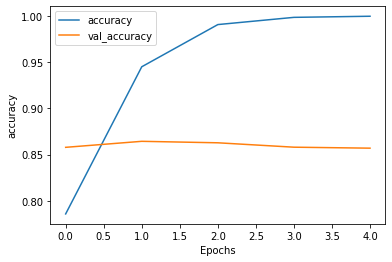

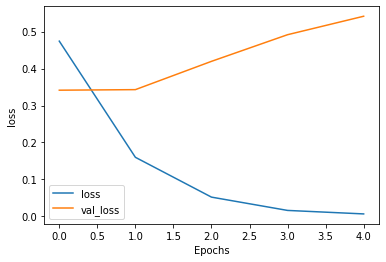

In [21]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [22]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.5688 - accuracy: 0.8512


[0.5687930583953857, 0.8511999845504761]

In [23]:
diff=0.9978-0.8529

In [24]:
diff<=2.5

True

In [25]:
predict=model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


In [26]:
np.around(predict[1])

array([1.], dtype=float32)

In [27]:
y_test[1]

1.0